In [1]:
# Import key modules
import numpy as np
from collections import Counter
from typing import Sequence, Tuple, Dict
import tiktoken # tokenizer for GPT-4
import requests
import re
import matplotlib.pyplot as plt

# **Explore GPT-5 tokenizer**

In [2]:
import tiktoken
print(tiktoken.__version__)
tokenizer = tiktoken.get_encoding("o200k_harmony")

0.12.0


In [3]:
tokenizer.n_vocab

201088

In [4]:
tokenizer.encode("Anirban")

[2223, 380, 6893]

In [5]:
import tiktoken
print(tiktoken.list_encoding_names())

['gpt2', 'r50k_base', 'p50k_base', 'p50k_edit', 'cl100k_base', 'o200k_base', 'o200k_harmony']


In [6]:
import inspect
print(inspect.signature(tiktoken.get_encoding))

(encoding_name: 'str') -> 'Encoding'


In [7]:
tiktoken.list_encoding_names()

['gpt2',
 'r50k_base',
 'p50k_base',
 'p50k_edit',
 'cl100k_base',
 'o200k_base',
 'o200k_harmony']

In [8]:
import requests
# Get the data
book = requests.get('https://www.gutenberg.org/files/35/35-0.txt')

text = book.text
len(text)

182973

In [9]:
# Encode the text using GPT-5 tokenizer - 'o200k_harmony'
tokenizer = tiktoken.get_encoding('o200k_harmony')
tokens = tokenizer.encode(text)

In [10]:
# Split the word by punctuations
import re
import numpy as np

pattern = re.compile(r'([,.:;—?_!"“()\']|--|\s)')
words = re.split(pattern, text)
words = [item.strip() for item in words if item.strip()]

token_count = np.zeros((len(words),2),dtype=int)

for idx, w in enumerate(words):
  token_count[idx,0] = len(w)
  token_count[idx,1] = len(tokenizer.encode(w))

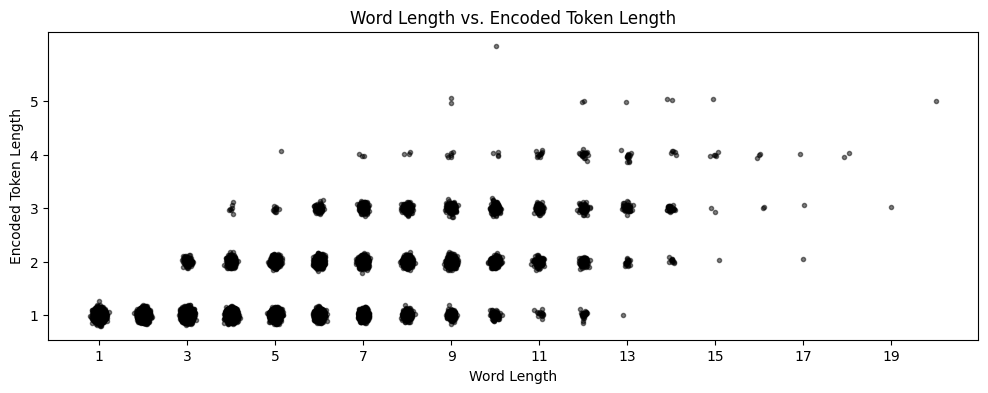

In [11]:
from matplotlib import figure
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

offsetX = np.random.randn(len(words)) * 0.05
offsetY = np.random.randn(len(words)) * 0.05

plt.scatter(token_count[:,0]+offsetX, token_count[:,1]+offsetY, c='k', marker='.', alpha=0.5)

# Compute nice tick ranges based on data, not len(words)
max_x = int(token_count[:, 0].max())
max_y = int(token_count[:, 1].max())

step_x = max(1, max_x // 10)
step_y = max(1, max_y // 10)

plt.gca().set(xlabel='Word Length', ylabel='Encoded Token Length', xticks=np.arange(1,max_x, step_x), yticks=np.arange(1,max_y, step_y))
plt.title('Word Length vs. Encoded Token Length')
plt.show();

In [12]:
# Get the list of words where word length = 14
words_14_chars_idx = np.where(token_count[:,0] == 14)[0]

for idx in words_14_chars_idx:
  word = words[idx]
  encoded_tokens = tokenizer.encode(word)
  word_decoded_parts = [tokenizer.decode([token_id]) for token_id in encoded_tokens]
  print(f"{word:>14} -> {word_decoded_parts}")

intermittently -> ['inter', 'mitt', 'ently']
mathematicians -> ['mat', 'hem', 'atic', 'ians']
Time-Dimension -> ['Time', '-D', 'imension']
Time-Dimension -> ['Time', '-D', 'imension']
Time-Dimension -> ['Time', '-D', 'imension']
investigations -> ['invest', 'ig', 'ations']
Psychologist’s -> ['Psych', 'ologist', '’s']
potentialities -> ['potential', 'ities']
incredibleness -> ['in', 'cred', 'ib', 'leness']
aforementioned -> ['af', 'ore', 'mentioned']
wool-gathering -> ['w', 'ool', '-g', 'ather', 'ing']
interpretation -> ['interpret', 'ation']
Nebuchadnezzar -> ['Neb', 'uch', 'adne', 'zz', 'ar']
Psychologist’s -> ['Psych', 'ologist', '’s']
overwhelmingly -> ['over', 'whel', 'ming', 'ly']
disappointment -> ['dis', 'appointment']
interrogations -> ['inter', 'rog', 'ations']
conversational -> ['con', 'vers', 'ational']
characteristic -> ['character', 'istic']
specialisation -> ['special', 'isation']
interpretation -> ['interpret', 'ation']
interpretation -> ['interpret', 'ation']
self-restr

In [13]:
# Find the token efficiency of words, denoted by word-length/ number of tokens
efficiency = token_count[:,0] / token_count[:,1]

max_efficient = np.max(efficiency)
min_efficient = np.min(efficiency)

max_efficient_words = np.where(efficiency == max_efficient)[0]
min_efficient_words = np.where(efficiency == min_efficient)[0]

max_efficient_words =  list(set([words[i] for i in max_efficient_words]))

min_effeicient_words = list(set([words[i] for i in min_efficient_words]))

print('Most Efficient Words:')
for w in max_efficient_words:
  print(f"{w} -> {max_efficient}")

print("Least Efficient Words:")
for w in min_effeicient_words:
  print(f"{w} -> {min_efficient}")

Most Efficient Words:
communication -> 13.0
Least Efficient Words:
! -> 1.0
I -> 1.0
A -> 1.0
] -> 1.0
D -> 1.0
— -> 1.0
, -> 1.0
G -> 1.0
X -> 1.0
_ -> 1.0
’ -> 1.0
V -> 1.0
; -> 1.0
a -> 1.0
“ -> 1.0
? -> 1.0
… -> 1.0
. -> 1.0
H -> 1.0
” -> 1.0
( -> 1.0
: -> 1.0
) -> 1.0


In [14]:
# Create a vocabulary with unique words from The Time Machine book (extracted above)

unique_words = np.unique(words)

# Sample a random token from the first 10% of random tokens from GPT-5 tokenizer
token_selected = np.random.randint(0, int(0.1*tokenizer.n_vocab))

token_selected = 18204

# Find the words from The Time Machine that contains the selected token
words_with_token = [w for w in unique_words if token_selected in tokenizer.encode(w)]

# Check with the full text instead of the unique stripped words from the book
seqs_with_token = np.array(tokens) == token_selected

print(f'The selected token is: {token_selected} and the word is "{tokenizer.decode([token_selected])}"')

# its occurance in our manually split words
print(f'*** From manual word split: Token appears {len(words_with_token)} times, including:\n----------------')
for w in words_with_token:
  print(f'{w}')

# its occurances in the GPT encoding
print(f'\n\n*** From encoding the full text: This token appears {sum(seqs_with_token)} times, including:\n----------------')
for s in np.where(seqs_with_token)[0]:
  print(f'{tokenizer.decode( np.array(tokens[s-5:s+5]) )}\n----------------')

The selected token is: 18204 and the word is "***"
*** From manual word split: Token appears 1 times, including:
----------------
***


*** From encoding the full text: This token appears 2 times, including:
----------------

----------------
 heart of man.


*** END OF THE PROJECT
----------------


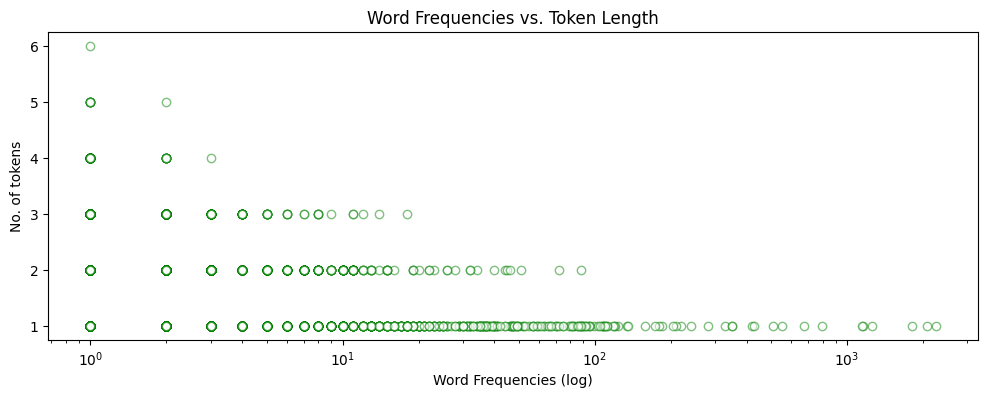

In [15]:
# Count the number of times each word appears in the full text
word_freq = Counter(words)

# Count the length of tokens of each word

freq_token_len_array = np.array([[word, count, len(tokenizer.encode(word))] for word, count in word_freq.items()])

# Create a scatter plot for the relation between frequency and length of tokens

plt.figure(figsize=(12,4))

plt.scatter(freq_token_len_array[:,1].astype(int), freq_token_len_array[:,2].astype(int), c='w', marker='o', edgecolors='g', alpha=0.5)
plt.gca().set(xlabel='Word Frequencies (log)', ylabel='No. of tokens', xscale = 'log')
plt.title('Word Frequencies vs. Token Length')

plt.show();

In [16]:
# Select 3 random tokens from GPT-5 tokenizer and combine them without spaces in between
tokens_selected = np.random.choice(tokenizer.n_vocab, 3, replace=False)
selected_list  = [tokenizer.decode([t]) for t in tokens_selected]

print(f'Selected words: {selected_list}')

print(f'Fake Word: "{"".join(s.strip() for s in selected_list)}"')

Selected words: ['ilyn', 'INF', '.si']
Fake Word: "ilynINF.si"
